We have predicted for customer side now we will be trying to predict for the host side.

In [38]:
import pandas as pd
import py
import matplotlib.pyplot as plt

In [87]:
listing_detailed = pd.read_csv('listings_detailed.csv')

C:\Users\prajw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
HostInfo=listing_detailed[['host_id','house_rules', 'host_since', 'host_location',
      'host_about', 'host_response_time', 'host_response_rate',
      'host_acceptance_rate', 'host_is_superhost',
      'host_picture_url', 'host_neighbourhood', 'host_listings_count',
      'host_total_listings_count', 
      'host_has_profile_pic', 'host_identity_verified','interaction','cleaning_fee','review_scores_accuracy', 'review_scores_cleanliness',
      'review_scores_checkin', 'review_scores_communication',
      'review_scores_location', 'review_scores_value', 'requires_license','review_scores_rating']]

In [90]:
HostInfo.host_is_superhost.replace(['t', 'f'], [1, 0], inplace=True)

C:\Users\prajw\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [91]:
HostInfo.fillna(0,inplace=True)

C:\Users\prajw\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


C:\Users\prajw\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


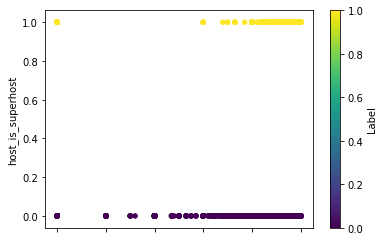

In [92]:
classmap = {}
for idx, name in enumerate(HostInfo['host_is_superhost'].unique()):
    classmap[name] = float(idx)
HostInfo['Label'] = HostInfo['host_is_superhost'].apply(lambda x: classmap[x])
HostInfo.plot.scatter(y = 'host_is_superhost', x = 'review_scores_rating', c='Label', colormap='viridis')

Review scores ratings are not related to the type of the host.

In [173]:
HostInfo.describe()

,host_id,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating,Label
count,5.004100e+04,50041.0,50041.000000,50041.000000,50041.000000,50041.000000,50041.000000,50041.000000,50041.000000,50041.000000,50041.000000,50041.000000,50041.000000
mean,5.194115e+07,0.0,0.154733,9.988889,9.988889,7.357347,7.102976,7.460662,7.479207,7.279411,7.189265,72.007374,0.154733
std,5.896460e+07,0.0,0.361654,80.850744,80.850744,4.118639,4.021292,4.163694,4.164970,4.076809,4.044498,40.234453,0.361654
min,2.830000e+02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.900870e+06,0.0,0.000000,1.000000,1.000000,8.000000,6.000000,8.000000,8.000000,8.000000,7.000000,73.000000,0.000000
50%,2.575312e+07,0.0,0.000000,1.000000,1.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,93.000000,0.000000
75%,7.772667e+07,0.0,0.000000,2.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99.000000,0.000000
max,2.184904e+08,0.0,1.000000,1433.000000,1433.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,1.000000


In [182]:
good_data = HostInfo.loc[HostInfo['host_total_listings_count']<30]

In [183]:
good_data.max()

host_id                        218490418
host_acceptance_rate                   0
host_is_superhost                      1
host_listings_count                   29
host_total_listings_count             29
review_scores_accuracy                10
review_scores_cleanliness             10
review_scores_checkin                 10
review_scores_communication           10
review_scores_location                10
review_scores_value                   10
requires_license                       f
review_scores_rating                 100
Label                                  1
dtype: object

In [93]:
df = HostInfo.loc[HostInfo['host_is_superhost']==1]

In [95]:
df

,host_id,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,...,cleaning_fee,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,review_scores_rating,Label
1,2787,-The security and comfort of all our guests is...,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,0,0,0.0,1.0,https://a0.muscache.com/im/pictures/8674565a-7...,...,$25.00,10.0,10.0,10.0,10.0,10.0,10.0,f,98.0,1.0
9,7386,NO SMOKING. EVER. No kids (it’s not suitable)....,2009-02-03,"New York, New York, United States",wunderlustful itinerant smarty pants ... cooki...,0,0,0.0,1.0,https://a0.muscache.com/im/users/7386/profile_...,...,$90.00,10.0,10.0,9.0,10.0,10.0,10.0,f,94.0,1.0
13,7549,No smoking in apartment. No Pets allowed. Ple...,2009-02-07,"New York, New York, United States","I live in NYC, but originally from Texas. Spen...",within a day,90%,0.0,1.0,https://a0.muscache.com/im/pictures/user/ae2d3...,...,$40.00,9.0,9.0,10.0,10.0,9.0,9.0,f,93.0,1.0
15,7987,0,2009-02-16,"New York, New York, United States",I love all the cultural aspects that NYC offer...,within an hour,100%,0.0,1.0,https://a0.muscache.com/im/users/7987/profile_...,...,$60.00,10.0,9.0,10.0,10.0,10.0,9.0,f,91.0,1.0
18,11975,House Rules: Make yourself at home at the West...,2009-04-01,"Los Angeles, California, United States",Hey there Airbnb travelers! I've been a host ...,0,0,0.0,1.0,https://a0.muscache.com/im/users/11975/profile...,...,$100.00,10.0,9.0,9.0,10.0,10.0,9.0,f,97.0,1.0
20,16800,"Healthy Rules, Shoes off before entering, Bru...",2009-05-12,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,within an hour,100%,0.0,1.0,https://a0.muscache.com/im/pictures/17c4d833-8...,...,0,10.0,10.0,10.0,10.0,10.0,10.0,f,98.0,1.0
23,17571,0,2009-05-17,"New York, New York, United States",Love tourists and know New York. Am not a lepr...,within an hour,100%,0.0,1.0,https://a0.muscache.com/im/users/17571/profile...,...,0,10.0,10.0,10.0,10.0,10.0,10.0,f,97.0,1.0
25,18946,"Primarily be a kind, open minded person. I do ...",2009-05-27,"New York, New York, United States",Raised in Europe and Asia I love to host inter...,within an hour,100%,0.0,1.0,https://a0.muscache.com/im/users/18946/profile...,...,$0.00,9.0,10.0,10.0,10.0,10.0,9.0,f,96.0,1.0
48,7549,"No smoking. No pets in apartment. No guests, e...",2009-02-07,"New York, New York, United States","I live in NYC, but originally from Texas. Spen...",within a day,90%,0.0,1.0,https://a0.muscache.com/im/pictures/user/ae2d3...,...,$0.00,9.0,9.0,10.0,10.0,9.0,10.0,f,96.0,1.0
49,46978,Please treat the apartment as your home. Come...,2009-10-19,"New York, New York, United States",I am an actor & adventurer originally from Tor...,0,0,0.0,1.0,https://a0.muscache.com/im/users/46978/profile...,...,$30.00,9.0,8.0,10.0,10.0,9.0,9.0,f,87.0,1.0


In [135]:
neighbourhood_GP = df.groupby('host_neighbourhood').host_id.count()
# neighbourhood_GP = df.groupby('host_neighbourhood').count()

In [136]:
neighbourhood_count = neighbourhood_GP.reset_index()
neighbourhood_count['host_id'] = neighbourhood_count.rename(columns={'host_id':'count'}, inplace=True)
neighbourhood_count.sort_values('count', ascending=[0]).head()

,host_neighbourhood,count,host_id
0,0,853,None
226,Williamsburg,590,None
15,Bedford-Stuyvesant,577,None
94,Harlem,348,None
210,Upper East Side,321,None


In [140]:
neighbourhood_count = neighbourhood_count[neighbourhood_count['count']<853]

In [146]:
neighbourhood_count.sort_values('count', ascending=[0]).reset_index()

,index,host_neighbourhood,count,host_id
0,226,Williamsburg,590,None
1,15,Bedford-Stuyvesant,577,None
2,94,Harlem,348,None
3,210,Upper East Side,321,None
4,29,Bushwick,318,None
5,95,Hell's Kitchen,291,None
6,53,Crown Heights,223,None
7,6,Astoria,198,None
8,211,Upper West Side,197,None
9,64,East Harlem,163,None


In [151]:
df['year'] = df['host_since'].apply(lambda x : x[:4])

C:\Users\prajw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
df.groupby('year').count()

,host_id,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,...,cleaning_fee,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,review_scores_rating,Label
year,,,,,,,,,,,,,,,,,,,,,
2008,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2009,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2010,262,262,262,262,262,262,262,262,262,262,...,262,262,262,262,262,262,262,262,262,262
2011,556,556,556,556,556,556,556,556,556,556,...,556,556,556,556,556,556,556,556,556,556
2012,890,890,890,890,890,890,890,890,890,890,...,890,890,890,890,890,890,890,890,890,890
2013,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022,...,1022,1022,1022,1022,1022,1022,1022,1022,1022,1022
2014,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,...,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
2015,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,...,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
2016,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,...,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


Hosts who joined in the year 2013, 2014, 2015, 2016 and 2017 have become superhosts. 

In [161]:
temp = df.groupby('host_id').host_listings_count.count()

In [164]:
temp = temp.reset_index()

In [165]:
temp.sort_values('host_listings_count', ascending=[0])

,host_id,host_listings_count
2722,22541573,100
2877,25237492,34
3624,48146336,18
1023,3250450,17
2790,23772724,15
1609,6885157,14
4450,100238132,12
3544,45595980,12
232,344035,11
394,836168,11
